Framework to be used is a quadrant of metrics with all possible combinations of new/existing users and new/existing features.

- New feature, new client
- Existing feature, new client
- New feature, existing client
- Existing feature, existing client

We will bucket at time intervals:

- 1 week
- 1 month
- 3 months
- 6 months
- 1 year

Qualities of interaction:

- First look/activation
- First key action (ie, first edit of default settings)
- Successful engagement

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
%matplotlib inline

import sys
sys.path.insert(1, '../../scripts/')
from s3_support import *

In [2]:
delta_week_1 = timedelta(weeks=1)
delta_week_4 = timedelta(weeks=4)
delta_week_12 = timedelta(weeks=12)
delta_week_24 = timedelta(weeks=24)
delta_week_52 = timedelta(weeks=52)

In [3]:
list_files("qgiv-stats-data")

form_paths.csv (1MB)
integrations_org_download.clean.csv (0MB)
logs.csv (306MB)
organizations.clean.csv (1MB)
organizations.csv (1MB)
orgs.csv (1MB)
--------------------------------------------------
Bucket qgiv-stats-data contains 6 files (0.3GB)


# Transactions

Going to group transactions by org into counts & sums at the bucket timeframes (1 week, 1 month, 3 months, 6 months, 1 year)

In [4]:
trans = get_dataframe_from_file("trans-records", "transactions.csv")
trans = trans[trans['status']=='A']
trans['date'] = pd.to_datetime(trans['date'])
trans.sort_values('date', ascending=True, inplace=True)

## Looking at rampup at the designated intervals

In [5]:
org_data = []

for o in trans['org'].unique():
    data = {}
    _df = trans[trans['org']==o]
    start_date = _df['date'].min()
    
    data['id'] = o
    data['start_date'] = start_date
    data['wk_1_ex_date'] = start_date + delta_week_1
    data['wk_4_ex_date'] = start_date + delta_week_4
    data['wk_12_ex_date'] = start_date + delta_week_12
    data['wk_24_ex_date'] = start_date + delta_week_24
    data['wk_52_ex_date'] = start_date + delta_week_52
    
    wk_1_trans = _df[_df['date'] <= data['wk_1_ex_date']]['amount']
    data['wk_1_count'] = len(wk_1_trans)
    data['wk_1_sum'] = np.sum(wk_1_trans)
    
    wk_4_trans = _df[(_df['date']>data['wk_1_ex_date'])&(_df['date']<=data['wk_4_ex_date'])]['amount']
    data['wk_4_count'] = len(wk_4_trans)
    data['wk_4_sum'] = np.sum(wk_4_trans)
    
    wk_12_trans = _df[(_df['date']>data['wk_4_ex_date'])&(_df['date']<=data['wk_12_ex_date'])]['amount']
    data['wk_12_count'] = len(wk_12_trans)
    data['wk_12_sum'] = np.sum(wk_12_trans)
    
    wk_24_trans = _df[(_df['date']>data['wk_12_ex_date'])&(_df['date']<=data['wk_24_ex_date'])]['amount']
    data['wk_24_count'] = len(wk_24_trans)
    data['wk_24_sum'] = np.sum(wk_24_trans)
    
    wk_52_trans = _df[(_df['date']>data['wk_24_ex_date'])&(_df['date']<=data['wk_52_ex_date'])]['amount']
    data['wk_52_count'] = len(wk_52_trans)
    data['wk_52_sum'] = np.sum(wk_52_trans)
    
    org_data.append(data)

In [6]:
del(trans)
df_orgs = pd.DataFrame(org_data)

In [7]:
df_orgs.head()

,id,start_date,wk_12_count,wk_12_ex_date,wk_12_sum,wk_1_count,wk_1_ex_date,wk_1_sum,wk_24_count,wk_24_ex_date,wk_24_sum,wk_4_count,wk_4_ex_date,wk_4_sum,wk_52_count,wk_52_ex_date,wk_52_sum
0,6,2006-05-18,1,2006-08-10,10.0,2,2006-05-25,15.0,3,2006-11-02,15.0,5,2006-06-15,13.0,22,2007-05-17,202.0
1,13,2006-08-22,0,2006-11-14,0.0,1,2006-08-29,5.0,3,2007-02-06,20.0,1,2006-09-19,100.0,18,2007-08-21,5025.0
2,17,2007-02-06,23,2007-05-01,17150.0,1,2007-02-13,1.0,25,2007-07-24,6927.0,0,2007-03-06,0.0,16,2008-02-05,2281.0
3,23,2007-04-05,2,2007-06-28,150.0,1,2007-04-12,1.0,2,2007-09-20,101.0,0,2007-05-03,0.0,1,2008-04-03,10.0
4,24,2007-04-05,0,2007-06-28,0.0,2,2007-04-12,11.0,1,2007-09-20,5.0,0,2007-05-03,0.0,0,2008-04-03,0.0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


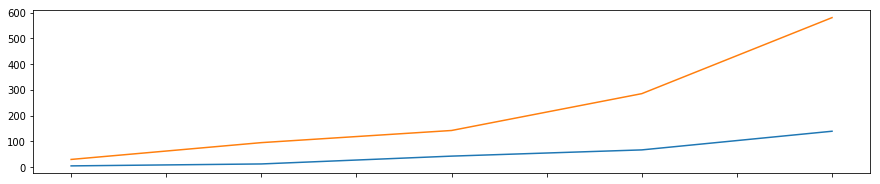

In [8]:
print(df_orgs[['wk_1_count', 'wk_4_count', 'wk_12_count', 'wk_24_count', 'wk_52_count']].mean().plot(figsize=(15,3)))
print(df_orgs[['wk_1_count', 'wk_4_count', 'wk_12_count', 'wk_24_count', 'wk_52_count']].std().plot(figsize=(15,3)))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


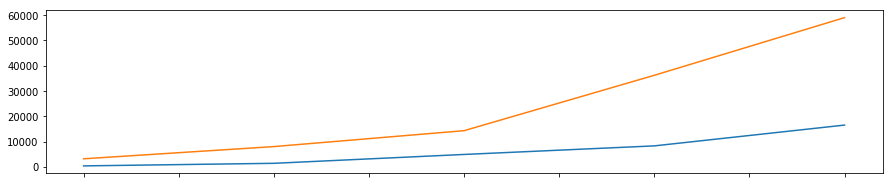

In [9]:
print(df_orgs[['wk_1_sum', 'wk_4_sum', 'wk_12_sum', 'wk_24_sum', 'wk_52_sum']].mean().plot(figsize=(15,3)))
print(df_orgs[['wk_1_sum', 'wk_4_sum', 'wk_12_sum', 'wk_24_sum', 'wk_52_sum']].std().plot(figsize=(15,3)))

In [18]:
# df_orgs.to_csv("orgs_weekly_stats.csv", index=False)

## Looking at characteristics of orgs with 1 std above the mean

In [10]:
count_4_mean = df_orgs['wk_4_count'].mean()
count_4_std = df_orgs['wk_4_count'].std()
count_12_mean = df_orgs['wk_12_count'].mean()
count_12_std = df_orgs['wk_12_count'].std()
count_24_mean = df_orgs['wk_24_count'].mean()
count_24_std = df_orgs['wk_24_count'].std()
count_52_mean = df_orgs['wk_52_count'].mean()
count_52_std = df_orgs['wk_52_count'].std()

In [11]:
orgs_better_4 = df_orgs[df_orgs['wk_4_count'] > (count_4_mean + count_4_std)]
orgs_better_12 = df_orgs[df_orgs['wk_12_count'] > (count_12_mean + count_12_std)]
orgs_better_24 = df_orgs[df_orgs['wk_24_count'] > (count_24_mean + count_24_std)]
orgs_better_52 = df_orgs[df_orgs['wk_52_count'] > (count_52_mean + count_52_std)]

Need to look at feature activation in order to determine how well org's are using these features. This data can be compared against the org performance from transactions in order to evaluate their success.

In [12]:
wk_1_orgs = None
wk_4_orgs = None
wk_12_orgs = None
wk_24_orgs = None
wk_52_orgs = None

print("{} total orgs".format(len(df_orgs)))

for i in [1, 4, 12, 24, 52]:
    this_mean = df_orgs["wk_{}_count".format(i)].mean()
    this_std = df_orgs["wk_{}_count".format(i)].std()
    
    _better_orgs = df_orgs[df_orgs["wk_{}_count".format(i)] > (this_mean + this_std)]
    _len_orgs = len(df_orgs[df_orgs['id'].isin(_better_orgs['id'].tolist())])
    
    print("1 std above trans count at the {} week: {} orgs ".format(i, _len_orgs))
    
    if i == 1:
        wk_1_orgs = _better_orgs.copy()
    elif i == 4:
        wk_4_orgs = _better_orgs.copy()
    elif i == 12:
        wk_12_orgs = _better_orgs.copy()
    elif i == 24:
        wk_24_orgs = _better_orgs.copy()
    elif i == 52:
        wk_52_orgs = _better_orgs.copy()

4798 total orgs
1 std above trans count at the 1 week: 82 orgs 
1 std above trans count at the 4 week: 89 orgs 
1 std above trans count at the 12 week: 241 orgs 
1 std above trans count at the 24 week: 183 orgs 
1 std above trans count at the 52 week: 178 orgs 


# Logs

_clear for independent start_

In [ ]:
df_orgs = pd.read_csv("orgs_weekly_stats.csv", index=False)

In [13]:
logs = get_dataframe_from_file("qgiv-stats-data", "logs.csv")

'''
logs['created'] = pd.to_datetime(logs['created'])
logs['org'] = logs['org'].fillna(0).astype(int)
logs['entity'] = logs['entity'].fillna(0).astype(int)
logs['entityType'] = logs['entityType'].fillna(0).astype(int)
logs['form'] = logs['form'].fillna(0).astype(int)
logs['systemType'] = logs['systemType'].fillna(0).astype(int)
logs['userId'] = logs['userId'].fillna(0).astype(int)
logs['user'] = logs['user'].fillna(0).astype(int)
logs['systemId'] = logs['systemId'].fillna(0).astype(int)
'''

logs['wk_1'] = False
logs['wk_4'] = False
logs['wk_12'] = False
logs['wk_24'] = False
logs['wk_52'] = False

In [ ]:
for _, o in df_orgs.iterrows():
    start_date = o['start_date']
    wk_1_ex = start_date + delta_week_1
    wk_4_ex = start_date + delta_week_4
    wk_12_ex = start_date + delta_week_12
    wk_24_ex = start_date + delta_week_24
    wk_52_ex = start_date + delta_week_52
    
    logs['wk_1'] = logs[['org', 'wk_1', 'created']].apply(lambda x: x['created']<=wk_1_ex if x['org'] == o['id'] else x['wk_1'], axis=1)
    logs['wk_4'] = logs[['org', 'wk_4', 'created']].apply(lambda x: x['created']<=wk_4_ex if x['org'] == o['id'] else x['wk_4'], axis=1)
    logs['wk_12'] = logs[['org', 'wk_12', 'created']].apply(lambda x: x['created']<=wk_12_ex if x['org'] == o['id'] else x['wk_12'], axis=1)
    logs['wk_24'] = logs[['org', 'wk_24', 'created']].apply(lambda x: x['created']<=wk_24_ex if x['org'] == o['id'] else x['wk_24'], axis=1)
    logs['wk_52'] = logs[['org', 'wk_52', 'created']].apply(lambda x: x['created']<=wk_52_ex if x['org'] == o['id'] else x['wk_52'], axis=1)

In [ ]:
len_any_logs = len(logs[logs['wk_1']|logs['wk_4']|logs['wk_12']|logs['wk_24']|logs['wk_52']])
"{} entries; {} time ex entries".format(len(logs), len_any_logs)

In [16]:
tst_orgs = df_orgs.iloc[-600:-550].copy()

print("{} orgs; start dates from {:%Y-%m-%d} to {:%Y-%m-%d}".format(len(tst_orgs), tst_orgs['start_date'].min(), tst_orgs['start_date'].max()))

_logs = logs[logs['org'].isin(tst_orgs['id'].tolist())].copy()
_logs['created'] = pd.to_datetime(_logs['created'])

print("{} log entries from {:%Y-%m-%d} to {:%Y-%m-%d}".format(len(_logs), _logs['created'].min(), _logs['created'].max()))

50 orgs; start dates from 2019-02-04 to 2019-02-25
15815 log entries from 2018-07-31 to 2019-11-03


In [26]:

for i in range(5):
    ex_org = tst_orgs[['id', 'start_date', 'wk_1_ex_date', 'wk_4_ex_date', 'wk_12_ex_date', 'wk_24_ex_date', 'wk_52_ex_date']].iloc[i]
    ex_logs = _logs[_logs['org']==ex_org['id']].copy()

    ex_logs['wk_1'] = ex_logs['created']<=ex_org['wk_1_ex_date']
    ex_logs['wk_4'] = (ex_logs['created']>ex_org['wk_1_ex_date'])&(ex_logs['created']<=ex_org['wk_4_ex_date'])
    ex_logs['wk_12'] = (ex_logs['created']>ex_org['wk_4_ex_date'])&(ex_logs['created']<=ex_org['wk_12_ex_date'])
    ex_logs['wk_24'] = (ex_logs['created']>ex_org['wk_12_ex_date'])&(ex_logs['created']<=ex_org['wk_24_ex_date'])
    ex_logs['wk_52'] = (ex_logs['created']>ex_org['wk_24_ex_date'])&(ex_logs['created']<=ex_org['wk_52_ex_date'])

    print("Example org {}".format(i))
    print("{} logs".format(len(ex_logs)))
    print("{} wk 1 logs".format(len(ex_logs[ex_logs['wk_1']])))
    print("{} wk 4 logs".format(len(ex_logs[ex_logs['wk_4']])))
    print("{} wk 12 logs".format(len(ex_logs[ex_logs['wk_12']])))
    print("{} wk 52 logs".format(len(ex_logs[ex_logs['wk_52']])))
    print("-"*20)

Example org 0
49 logs
24 wk 1 logs
0 wk 4 logs
15 wk 12 logs
5 wk 52 logs
--------------------
Example org 1
14 logs
11 wk 1 logs
3 wk 4 logs
0 wk 12 logs
0 wk 52 logs
--------------------
Example org 2
2011 logs
17 wk 1 logs
24 wk 4 logs
23 wk 12 logs
1686 wk 52 logs
--------------------
Example org 3
1044 logs
15 wk 1 logs
7 wk 4 logs
539 wk 12 logs
19 wk 52 logs
--------------------
Example org 4
14 logs
14 wk 1 logs
0 wk 4 logs
0 wk 12 logs
0 wk 52 logs
--------------------


# Data check

In [27]:
logs = pd.read_csv("org_week_tagged_logs.csv")

In [29]:
print("{} total entries".format(len(logs)))
for i in [1, 4, 12, 24, 52]:
    print("Wk {}: {}".format(i, len(logs[logs['wk_{}'.format(i)]])))

1812669 total entries
Wk 1: 37023
Wk 4: 44791
Wk 12: 155108
Wk 24: 238359
Wk 52: 385419


In [36]:
for i in [1, 4, 12, 24, 52]:
    print("Wk {}: {}".format(i, len(logs[logs['wk_{}'.format(i)]])))
    print(logs[logs['wk_{}'.format(i)]]['systemtype'].value_counts(normalize=True)[:4])

Wk 1: 37023
35    0.309564
39    0.124058
36    0.084461
24    0.080653
Name: systemtype, dtype: float64
Wk 4: 44791
27    0.230359
28    0.141636
13    0.141033
25    0.135920
Name: systemtype, dtype: float64
Wk 12: 155108
27    0.344960
25    0.151043
13    0.145215
28    0.133862
Name: systemtype, dtype: float64
Wk 24: 238359
27    0.361627
25    0.155652
13    0.148549
28    0.137721
Name: systemtype, dtype: float64
Wk 52: 385419
27    0.359801
25    0.162462
13    0.162382
28    0.122007
Name: systemtype, dtype: float64
